In [71]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__


# SHIFT+CTLR+SPACE to see any function definitions.

'2.5.1+cu121'

In [72]:
#device

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [73]:
#Data
## create some data linear regression formula y = weight*X + bias

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
#print(f'X: {X}')


y = weight*X + bias
#print(f'y: {y}')
#X[:10], y[:10]

train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

#len(X_train), len(y_train), len(X_test), len(y_test)


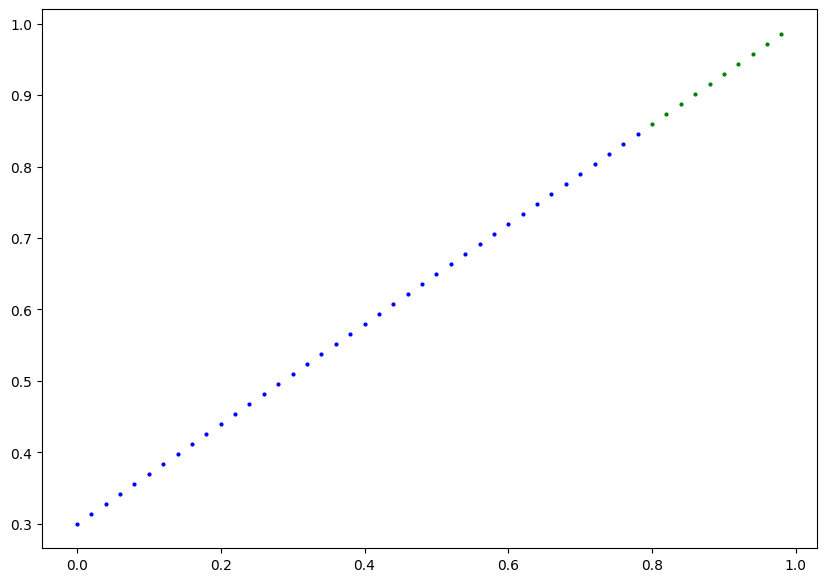

In [90]:
#plot the data
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  plt.figure(figsize=(10, 7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")


  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})

plot_predictions(X_train, y_train, X_test, y_test)

In [97]:
# build the pytorch linear model
import torch
from torch import nn #nn.model

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # using nn.Liner instead of parameter for creating model parameter. one value of x gives one value of y
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()

#train the model
#Loss function
#optimizer
#training loop
#testing loop

loss_fn = nn.L1Loss() #MAE
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

#training loop
torch.manual_seed(42)
epochs = 200

for epoch in range(epochs):
  model_1.train()

  # forward pass
  y_pred = model_1(X_train)

  # calculate the loss
  loss = loss_fn(y_pred, y_train)

  # optimizer zero grad
  optimizer.zero_grad()

  # 4. perform back propogation on the loss function
  loss.backward()

  # Optimze the model
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  #print out what is happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")


Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test Loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test Loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test Loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test Loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test Loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test Loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test Loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test Loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.01380180753767

In [92]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [93]:
weight, bias

(0.7, 0.3)

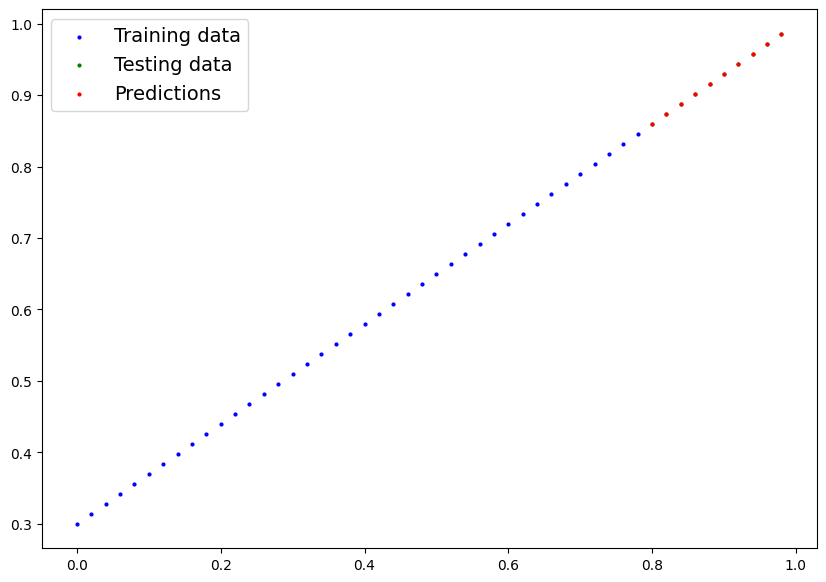

In [98]:
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)
plot_predictions(predictions=y_preds)



In [101]:
# save model and load the model

from pathlib import Path

# 1. create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model save path
MODEL_NAME = "7_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

#8:23:00

Saving model to: models/7_model.pth


In [104]:
# load a model

loaded_model = LinearRegressionModelV2()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))



<ipython-input-104-2d5b743f3622>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [107]:
loaded_model.state_dict()



OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

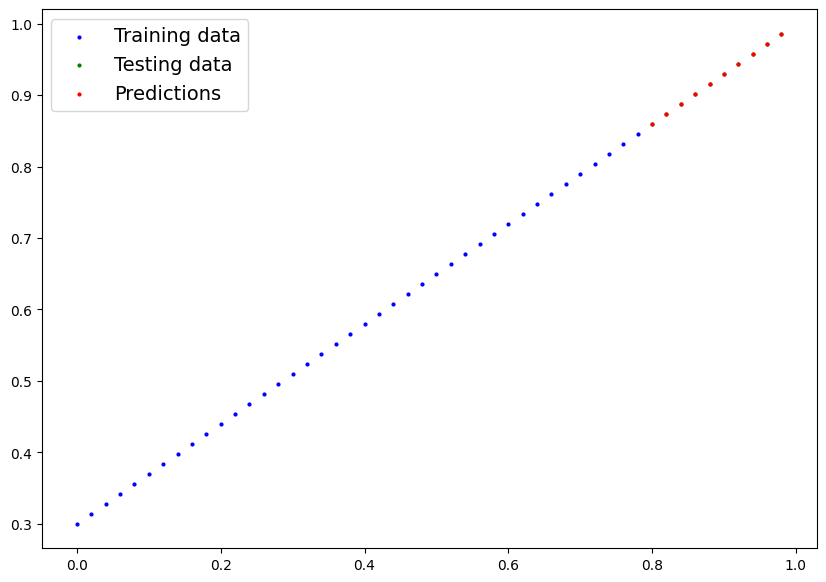

In [111]:
with torch.inference_mode():
  loaded_model_preds = loaded_model(X_test)

#y_preds == loaded_model_preds

plot_predictions(predictions=loaded_model_preds)